# Task1: Regression

In [69]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from catboost import CatBoostRegressor

import lightgbm as lgb
from lightgbm.sklearn import LGBMRegressor

from xgboost import XGBRegressor, plot_importance

from sklearn.linear_model import Ridge, LassoCV, HuberRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from mlxtend.regressor import StackingCVRegressor

import seaborn as sns


plt.style.use('fivethirtyeight')
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [70]:
train = pd.read_csv('../clean/train.csv')
test = pd.read_csv('../clean/test.csv')
train[train['density'].isna()]

,property_type,tenure,built_year,num_beds,num_baths,size_sqft,furnishing,available_unit_types,lat,lng,subzone,planning_area,price,shop_dist,mrt_dist,commercials_dist,second_school_dist,primary_school_dist,density


In [71]:
labelEnc = preprocessing.LabelEncoder()
train.planning_area = labelEnc.fit_transform(train.planning_area)
train.subzone = labelEnc.fit_transform(train.subzone)
train.furnishing = labelEnc.fit_transform(train.furnishing)
train.tenure = labelEnc.fit_transform(train.tenure)
train.property_type = labelEnc.fit_transform(train.property_type)
train.available_unit_types = labelEnc.fit_transform(train.available_unit_types)

test.planning_area = labelEnc.fit_transform(test.planning_area)
test.subzone = labelEnc.fit_transform(test.subzone)
test.furnishing = labelEnc.fit_transform(test.furnishing)
test.tenure = labelEnc.fit_transform(test.tenure)
test.property_type = labelEnc.fit_transform(test.property_type)
test.available_unit_types = labelEnc.fit_transform(test.available_unit_types)

In [72]:
test.isnull().sum()

property_type           0
tenure                  0
built_year              0
num_beds                0
num_baths               0
size_sqft               0
furnishing              0
available_unit_types    0
lat                     0
lng                     0
subzone                 0
planning_area           0
shop_dist               0
mrt_dist                0
commercials_dist        0
second_school_dist      0
primary_school_dist     0
density                 0
dtype: int64

In [73]:
df_X = train.drop(axis=1,columns=['price'])
df_y = train["price"]

In [74]:
df_X.isnull().sum()

property_type           0
tenure                  0
built_year              0
num_beds                0
num_baths               0
size_sqft               0
furnishing              0
available_unit_types    0
lat                     0
lng                     0
subzone                 0
planning_area           0
shop_dist               0
mrt_dist                0
commercials_dist        0
second_school_dist      0
primary_school_dist     0
density                 0
dtype: int64

In [75]:
# Convert dataframes to numpy arrays
X, y = df_X.to_numpy(), df_y.to_numpy()
y = y.ravel().astype(int)

# Split dataset in training and test data (20% test data)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)
y_train = y_train
# Normalize data using the sciki-learn StandardScaler
scaler = preprocessing.StandardScaler().fit(X_train)
X_train, X_val = scaler.transform(X_train), scaler.transform(X_val)

print('Number of features: {}'.format(X_train.shape[1]))
print('Number of samples for training: {}'.format(X_train.shape[0]))
print('Number of samples for testing: {}'.format(X_val.shape[0]))

Number of features: 18
Number of samples for training: 15961
Number of samples for testing: 3991


In [76]:
%%time
randomForestRegressor = RandomForestRegressor().fit(X_train, y_train)
decisionTreeRegressor = DecisionTreeRegressor().fit(X_train, y_train)
adaBoostRegressor = AdaBoostRegressor().fit(X_train, y_train)
gdbtRegressor = GradientBoostingRegressor().fit(X_train, y_train)
catBoostRegressor = CatBoostRegressor().fit(X_train, y_train)

Learning rate set to 0.063425
0:	learn: 308164706.1780499	total: 57.8ms	remaining: 57.7s
1:	learn: 303397344.2419997	total: 59.9ms	remaining: 29.9s
2:	learn: 298798603.1961409	total: 62.1ms	remaining: 20.6s
3:	learn: 294363768.7739996	total: 64.4ms	remaining: 16s
4:	learn: 290088371.2604299	total: 66.5ms	remaining: 13.2s
5:	learn: 285967740.8679402	total: 68.8ms	remaining: 11.4s
6:	learn: 281997907.4072148	total: 70.9ms	remaining: 10.1s
7:	learn: 278173361.1114264	total: 73.9ms	remaining: 9.16s
8:	learn: 274491981.9629429	total: 76ms	remaining: 8.37s
9:	learn: 270948895.2061110	total: 78ms	remaining: 7.73s
10:	learn: 267539562.3888194	total: 80.3ms	remaining: 7.22s
11:	learn: 264260705.3740112	total: 82.5ms	remaining: 6.79s
12:	learn: 261107603.2112981	total: 84.4ms	remaining: 6.41s
13:	learn: 258076518.4802701	total: 86.4ms	remaining: 6.08s
14:	learn: 255164013.2166549	total: 88.9ms	remaining: 5.83s
15:	learn: 252367084.7259653	total: 90.8ms	remaining: 5.59s
16:	learn: 249680643.58549

In [77]:

%%time
print('Root Mean Squared Errors for all regressors')
print('============================')
rlist = []

for rgs in [decisionTreeRegressor, randomForestRegressor, gdbtRegressor, catBoostRegressor]:
    try:
        # Predict for test samples
        y_pred = rgs.predict(X_val)
        # Calculate the root mean squared error and mean absolute error
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        mae = mean_absolute_error(y_val, y_pred)
        rlist.append(rmse)
    except Exception as e:
        print(e)
        # Handle exception (e.g., a classifier is still None)
        mae = '---'

    print('{} mae: {:.3} rmse: {:.3}'.format(type(rgs).__name__, mae, rmse))


Root Mean Squared Errors for all regressors
DecisionTreeRegressor mae: 3.08e+05 rmse: 1.71e+06
RandomForestRegressor mae: 2.9e+05 rmse: 1.55e+06
GradientBoostingRegressor mae: 6.51e+05 rmse: 2.21e+06
CatBoostRegressor mae: 4.19e+05 rmse: 1.59e+06
CPU times: user 133 ms, sys: 7.62 ms, total: 141 ms
Wall time: 125 ms


In [78]:
rlist

[1710243.1902198498, 1551386.4533522185, 2211163.743958443, 1591022.1740315824]

In [79]:
%%time
X, y = df_X.to_numpy(), df_y.to_numpy()
y = y.ravel().astype(int)

# LightGBM
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2)
my_imputer = SimpleImputer()
train_X = my_imputer.fit_transform(train_X)
val_X = my_imputer.transform(val_X)

lgbm = lgb.LGBMRegressor(objective='regression', learning_rate=0.05, n_estimators=1000)
lgbm.fit(train_X, train_y, verbose=False)

predictions = lgbm.predict(val_X)

rmse = np.sqrt(mean_squared_error(predictions, val_y))
print("Root Mean Squared Error : " + str(rmse))
rlist.append(rmse)

Root Mean Squared Error : 8811563.407103725
CPU times: user 10.2 s, sys: 204 ms, total: 10.4 s
Wall time: 931 ms


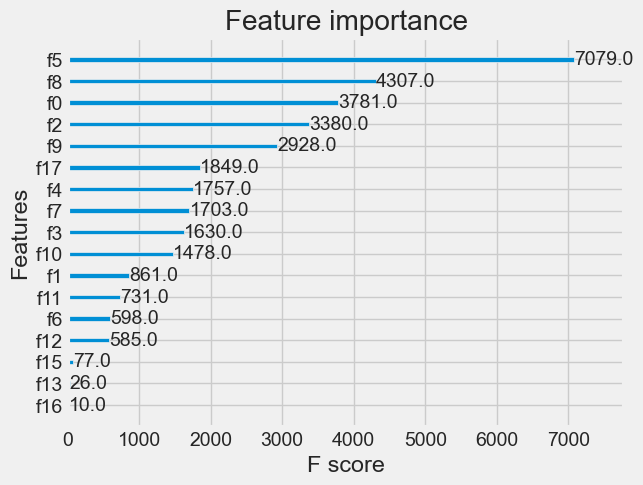

Root Mean Squared Error : 5492365.861273691
CPU times: user 1min 6s, sys: 1.46 s, total: 1min 7s
Wall time: 5.96 s


In [80]:
%%time

X, y = df_X.to_numpy(), df_y.to_numpy()
y = y.ravel().astype(int)

xgb = XGBRegressor(learning_rate=0.05, n_estimators=1000,  objective='reg:gamma')
xgb.fit(X_train, y_train)

pred = xgb.predict(X_val)

plot_importance(xgb)
plt.show()

rmse = np.sqrt(mean_squared_error(pred, val_y))
print("Root Mean Squared Error : " + str(rmse))
rlist.append(rmse)

In [81]:
%%time

stackmodel = StackingCVRegressor(regressors=(decisionTreeRegressor, randomForestRegressor, gdbtRegressor, lgbm, xgb), meta_regressor=randomForestRegressor, use_features_in_secondary=True)
rgs_stack = stackmodel.fit(X_train, y_train)
y_pred = rgs_stack.predict(X_val)

# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mae = mean_absolute_error(y_val, y_pred)
print('{} mae: {:.3} rmse: {:.3}'.format(type(rgs_stack).__name__, mae, rmse))
rlist.append(rmse)

StackingCVRegressor mae: 3.02e+05 rmse: 1.89e+06
CPU times: user 8min 13s, sys: 9.78 s, total: 8min 23s
Wall time: 1min 54s


In [82]:
rlist

[1710243.1902198498,
 1551386.4533522185,
 2211163.743958443,
 1591022.1740315824,
 8811563.407103725,
 5492365.861273691,
 1892798.1713578098]

Text(0.5, 1.0, 'Distribution plot of RMSE')

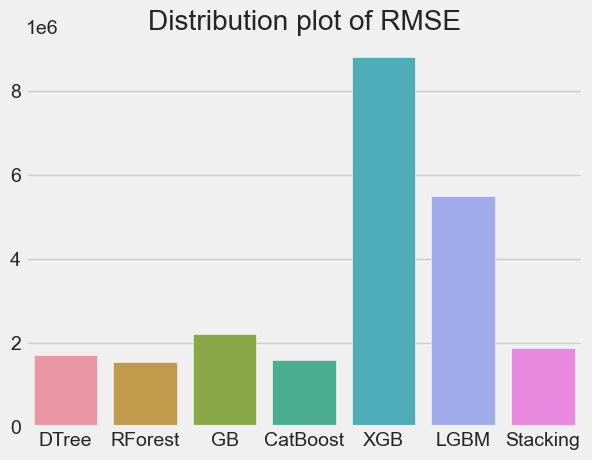

In [84]:
plt.figure()
sns.barplot(x=["DTree", "RForest", "GB","CatBoost", "XGB", "LGBM", "Stacking"], y=rlist)
plt.title("Distribution plot of RMSE")

In [85]:
%%time

param_grid = {
    'n_estimators': [20, 40, 100],
    'max_depth': [3, 10, None],
    'max_features': [12, 18, 27],
    'bootstrap': [True]
             }

rgs = RandomForestRegressor()
model = GridSearchCV(rgs, param_grid, cv=5,
                          scoring='neg_mean_squared_error')
model.fit(X_train, y_train)

# Store the parameters of the best model
best_params = model.best_params_

# Predict with test data on the model with the best found parameters
y_pred = model.predict(val_X)

# Calculate the root mean squared error
best_rmse = np.sqrt(mean_squared_error(y_val, y_pred))

print('Best RandomForestRegressor: {} (RMSE: {:.3f})'.format(best_params, best_rmse))

Best RandomForestRegressor: {'bootstrap': True, 'max_depth': 10, 'max_features': 12, 'n_estimators': 20} (RMSE: 1394637678.379)
CPU times: user 4min 29s, sys: 2.53 s, total: 4min 32s
Wall time: 4min 35s


In [86]:
pd.Series(y_pred).to_csv('../prediction/1.csv',index=True,index_label=['Id','Predicted'])

In [87]:
%%time

rgs = rgs_stack
X_for_test = scaler.transform(test)
y_pred_stack = rgs.predict(X_for_test)

CPU times: user 2.36 s, sys: 222 ms, total: 2.59 s
Wall time: 357 ms


In [88]:
pd.Series(y_pred_stack).to_csv('../prediction/1.csv',index=True,index_label=['Id','Predicted'])

In [89]:
y_pred_stack

array([1065506., 1341741., 1156800., ..., 3294158.,  556565., 4117008.])